## Este ejercicio tiene como objetivo explicar la construccion de un modelo de Redes Neuronales Artificiales Produndas (Deep Network) usando el data set MNIST

![](https://www.researchgate.net/publication/346702022/figure/fig1/AS:966313367322628@1607398468415/Analogia-entre-el-modelo-biologico-y-el-matematico-de-una-neurona-En-b-se-observa-como.jpg)

In [18]:
%matplotlib inline
import numpy as np                   
import matplotlib.pyplot as plt      
import random                        

from keras.datasets import mnist     
from keras.models import Sequential  

from keras.layers.core import Dense, Dropout, Activation 
from keras.utils import np_utils                        

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from keras.layers.normalization import BatchNormalization

In [21]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [22]:
# Again, do some formatting
# No hacemos el aplanado para hacer primero las CONV layers

X_train = X_train.reshape(60000, 28, 28, 1) #agregamos una dimension
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')         # cambiamos de enteros a float
X_test = X_test.astype('float32')

X_train /= 255                              # normalizamos
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [23]:
# one-hot format classes

nb_classes = 10 

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [8]:
model = Sequential()                                 

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer01 = Activation('relu')                     # activation
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer03 = Activation('relu')                     # activation
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())                                 # Flatten final 4x4x64 output matrix into a 1024-length vector

# Fully Connected Layer 5
model.add(Dense(512))                                # 512 FCN nodes
model.add(BatchNormalization())                      # normalization
model.add(Activation('relu'))                        # activation

# Fully Connected Layer 6                       
model.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model.add(Dense(10))                                 # final 10 FCN nodes
model.add(Activation('softmax'))                     # softmax activation

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0

In [25]:
# Mismo optimizador adam

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
# Aumentamos la data para prevenir overfitting

gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [27]:
train_generator = gen.flow(X_train, Y_train, batch_size=128)
test_generator = test_gen.flow(X_test, Y_test, batch_size=128)

In [28]:
model.fit_generator(train_generator, steps_per_epoch=60000//128, epochs=5, verbose=1, 
                    validation_data=test_generator, validation_steps=10000//128)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
468/468 [==============================] - 179s 380ms/step - loss: 0.0345 - accuracy: 0.9889 - val_loss: 0.0285 - val_accuracy: 0.9911
Epoch 2/5
468/468 [==============================] - 177s 379ms/step - loss: 0.0278 - accuracy: 0.9910 - val_loss: 0.0334 - val_accuracy: 0.9891
Epoch 3/5
468/468 [==============================] - 177s 379ms/step - loss: 0.0257 - accuracy: 0.9919 - val_loss: 0.0205 - val_accuracy: 0.9930
Epoch 4/5
468/468 [==============================] - 177s 378ms/step - loss: 0.0245 - accuracy: 0.9921 - val_loss: 0.0454 - val_accuracy: 0.9855
Epoch 5/5
468/468 [==============================] - 177s 378ms/step - loss: 0.0208 - accuracy: 0.9935 - val_loss: 0.0220 - val_accuracy: 0.9927


In [29]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 8s 25ms/step - loss: 0.0220 - accuracy: 0.9927
Test score: 0.02195683680474758
Test accuracy: 0.9926999807357788


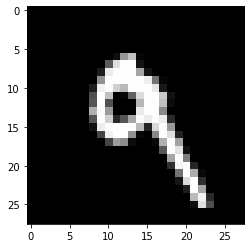

In [37]:
plt.figure()
plt.imshow(X_test[7].reshape(28,28), cmap='gray', interpolation='none')

In [40]:
predicted_classes = model.predict_classes(X_test)
correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


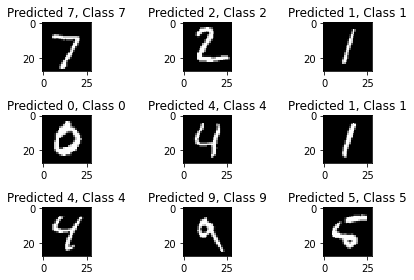

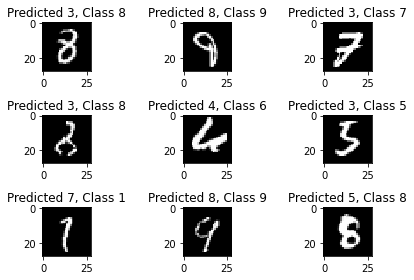

In [41]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()